# Decisions Trees

### Example for reference

In [2]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

pred = clf.predict([[2., 2.]])
print(pred)

[1]


### Using Decision trees to classifiy iris data

Import some things we will need, dismiss warnings and in line the graphs.

In [16]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

#Plotting gives unwanted warning message
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### The graphing function

Here we create different visuals for the decision tree, but in order to do that in 2 dimension we have to split the graphs up and create multiple classifiers.

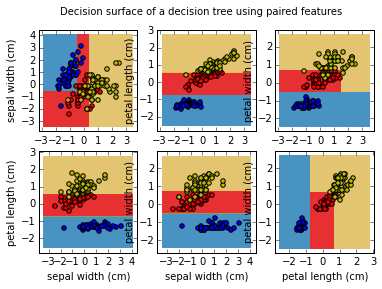

In [17]:
# Load Data
iris = load_iris()

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = tree.DecisionTreeClassifier(min_samples_split=50, max_depth=3).fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.show()

### Training our classifier

Here we train our classifier and then plot it. The training data has 4 features with 150 data points and 3 labels for the three different types of iris. We split our data 80/20 for training and testing.

In [18]:
# We have a small amount of data lets split our data 80%~ training 20%~ testing
# Usually I would go for a 75%/25% split

X_train = iris.data[:125]
y_train = iris.target[:125]

X_test = iris.data[125:]
y_test = iris.target[125:]

# Create a Decision Tree Calssifier and fit our training data
clf = tree.DecisionTreeClassifier(min_samples_split=50, max_depth=3)
clf.fit(X_train, y_train)

# Predict using our testing data and score our model
pred = clf.predict(X_test)
score = accuracy_score(y_test, pred)
print('Accuracy: {:.2%}'.format(score))


Accuracy: 88.00%


Here the classifier is looking at all 4 features at once, or looking at the whole dataset and trying to make a tree that can work with the data as a whole. Notice how I changed the `min_samples_split` and `max_depth` to keep the classifier from over fitting and for better performance. Now lets write our classifier to a file in dot notation and create a tree graphic with graphviz.  

Lets save our model to a file for later use or more training.

In [20]:
pkl.dump(clf, open('iris_tree.pkl', 'wb'))

**Note convert the dot file to a png with this command:**
```
dot -Tpng iris.dot -o iris.png
```

Here I just import a few things and use them to export and load the nice graphic.

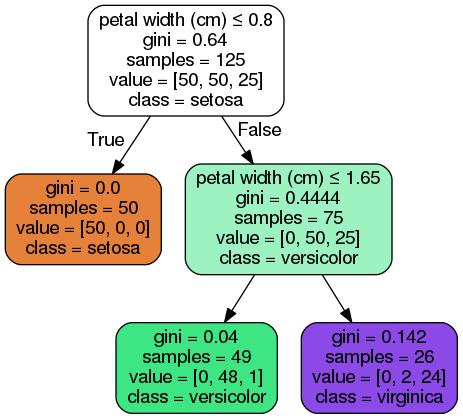

In [12]:
from IPython.display import Image
import pydot

# Write our dot file
dot_data = tree.export_graphviz(clf, out_file='iris.dot',  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  

# Load our converted dot file
Image('iris.png')

Now we have generated a beautiful tree and it was all done automatically!

### Conculsion

Decision trees are a very power full idea, when it comes to dependent events/probability and can also make a very good classifier for data, however the they are prone to over fitting, but that can be fixed by tuning the `max_depth`, `min_samples_split` and balancing the dataset. The real beauty of this is that it can all be done by a machine very quickly! Just image generating a decision tree by hand to do something similar, it can be vary laborious. The efficiency of this pretty good as well! $O(n_{features}n_{samples}log(n_{samples}))$

### Reference

sklearn: http://scikit-learn.org/stable/modules/tree.html  
udacity: https://www.udacity.com/wiki/ud120